We will rely on Pearson Correlation to explore potential correlations among crypto ETPs and BTC basic price data.
Pearson correlation coefficient r is a standard measure quantifying direct or indirect linear relationships between two variables.
r measures how strongly two continuous variables tend to vary similarly, in order to have relevant correlations the following are the conditions:
1_all variables are scaled and continuous
2_the relationship between any two variables has to be approximately linear
3_samples of the two variable are independent of each other.

In [39]:
#Importing modules/libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

Plotting data for overall trend visualization.

ValueError: num must be 1 <= num <= 36, not 37

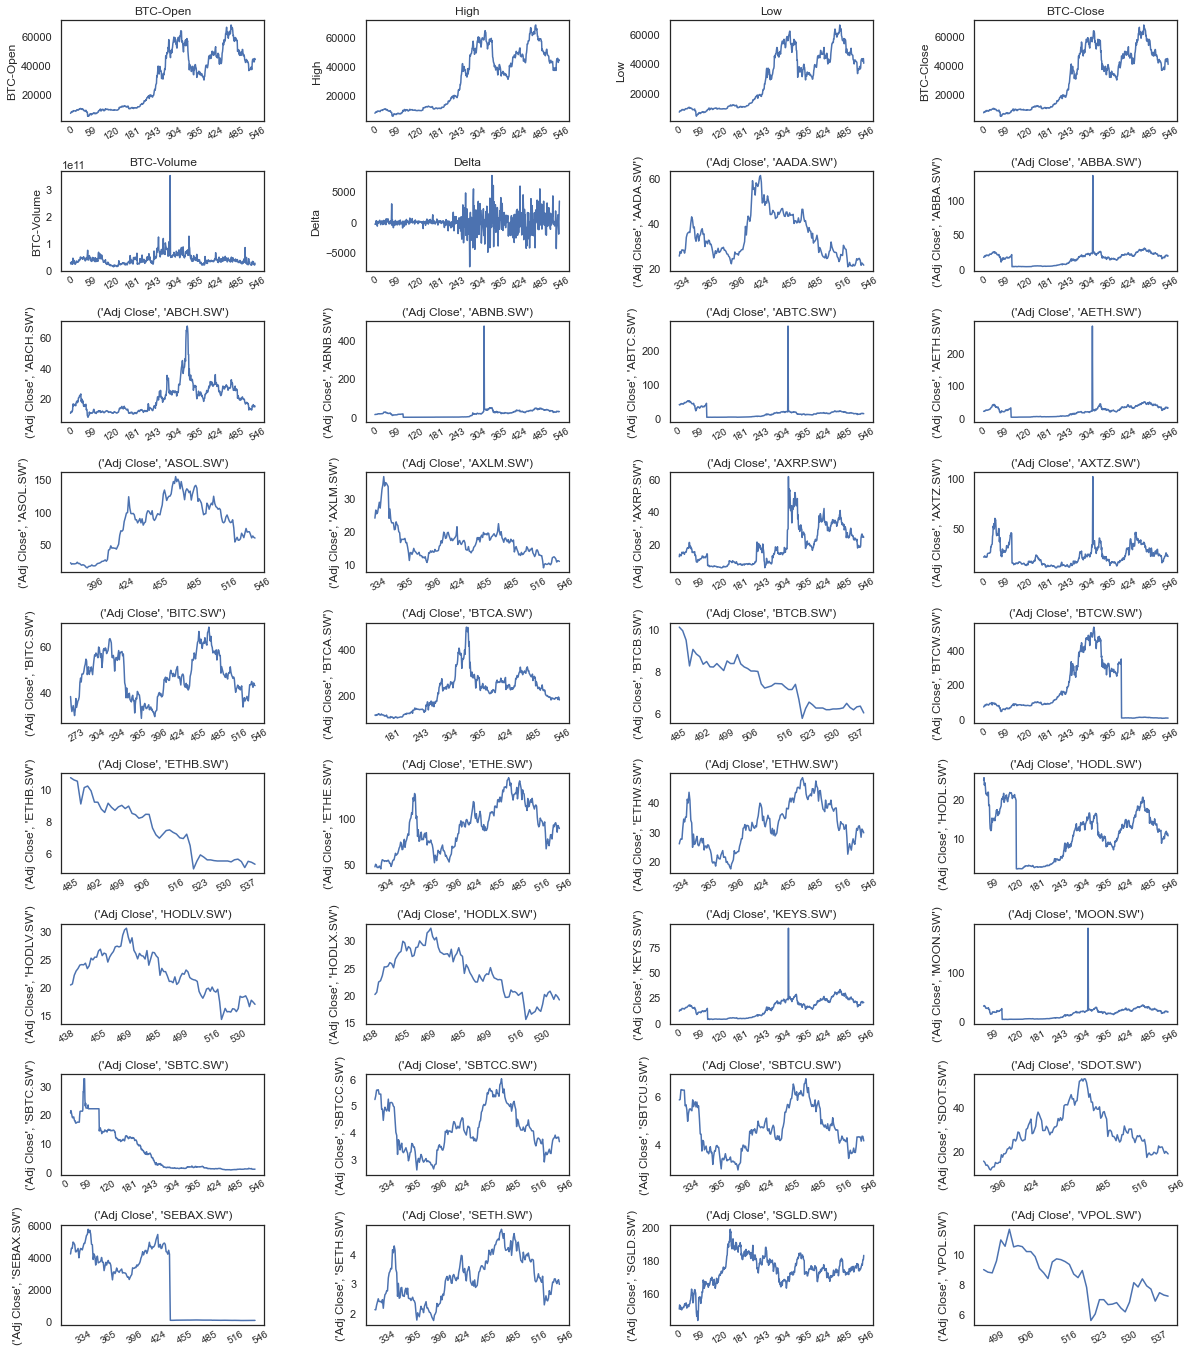

In [40]:
ETP_BTC_df = pd.read_csv(r'C:\Users\Fluffy\Desktop\Projects Coding\EDA_ETP_Amun21\ETH_BTC_df.csv')

df_plot = ETP_BTC_df.copy()
df_plot.drop(columns=['Date','Date.1'], inplace= True)
list_length = df_plot.shape[1]
ncols = 4
nrows = int(round(list_length / ncols, 0))

fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, figsize=(20,24))
fig.subplots_adjust(hspace=0.5, wspace = 0.5)
for i in range(0, list_length):
    ax = plt.subplot(nrows, ncols, i+1)
    sns.lineplot(data = df_plot.iloc[:, i], ax = ax)
    ax.set_title(df_plot.columns[i])
    ax.tick_params(axis = "x", rotation = 30, labelsize = 10, length = 0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

Creating the correlation matrix and visualizing with heatmap.

<AxesSubplot:>

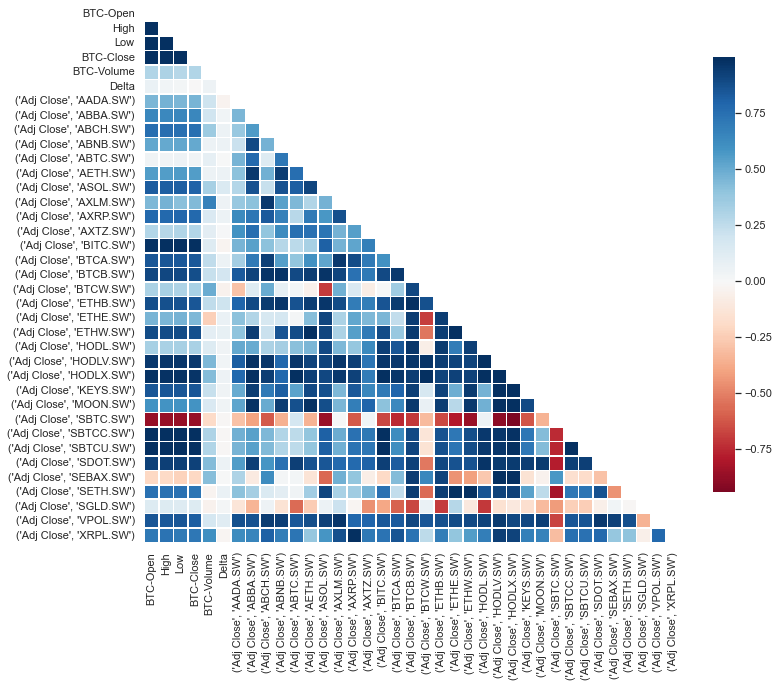

In [47]:
sns.set(style = "white")

df = pd.DataFrame(ETH_BTC_df)
corr = df.corr()

#Putting a mask for the upper triangle of the correlation heatmap.
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(12,16))
#Setting color map
cmap = "RdBu"

#Generating heatmap
sns.heatmap(
    corr,
    mask = mask,
    cmap = cmap, 
    center = 0,
    square = True,
    linewidths = 0.5,
    cbar_kws = {"shrink":0.5},
)

Obviously, it is difficult to spot quickly obvious/high correlations simply by looking above.
So let's filter weak correlations from our matrix, below.

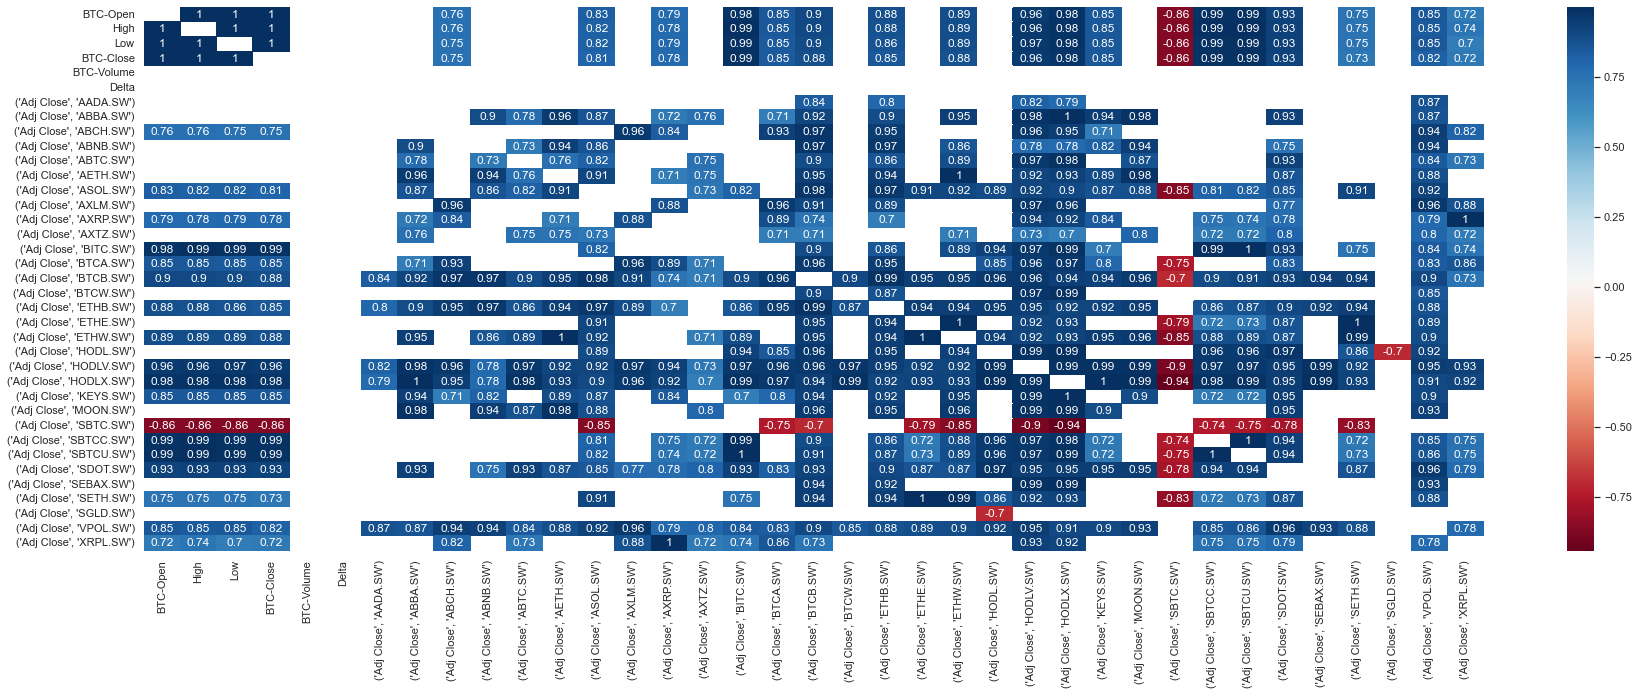

In [50]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .7) | (dfCorr <= -.7)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="RdBu")
plt.show()